In [149]:
#ライブラリのインポートを行う
import pandas as pd
import numpy as np

from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size = 14)
import seaborn as sns
sns.set(style = "white")
sns.set(style = "whitegrid", color_codes = True)

In [150]:
train =pd.read_csv("/Users/happycatcat523/pyworks/kaggle資料/titanic/train.csv")
test = pd.read_csv("/Users/happycatcat523/pyworks/kaggle資料/titanic/test.csv")

In [151]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [152]:
#train_shape = train.shape
train_shape = train.shape[0]
test_shape = test.shape


print(train_shape)
print(test_shape)

891
(418, 11)


In [153]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [154]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [155]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [156]:
# percent of missing "Age" 
print('Percent of missing "Age" records is %.2f%%' %((train['Age'].isnull().sum()/train.shape[0])*100))

Percent of missing "Age" records is 19.87%


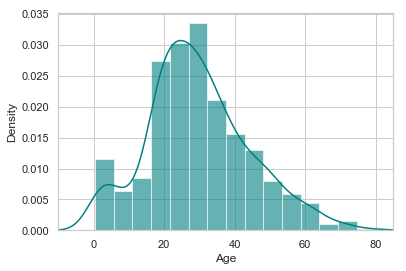

In [157]:
#旅客年齢のエントリの20％が欠落している。 
#「年齢」変数が一般的にどのように見えるかを見てみる。
ax = train["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [158]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [159]:
#「年齢」は（右）歪んでいるので、平均を使用すると、
#希望よりも古い年齢を入力することで偏った結果が得られる
#可能性がある。これに対処するために、中央値を使用して欠損値を代入する。

In [160]:
#年齢の平均値
print('%.2f' %(train['Age'].mean()))
#年齢の中央値
print('%.2f' %(train['Age'].median()))

29.70
28.00


In [161]:
#欠けているキャビンの値の割合
print('%.2f%%' %((train['Cabin'].isnull().sum()/train.shape[0])*100))

77.10%


In [162]:
#欠けているキ乗船港の値の割合
print('%.2f%%' %((train['Embarked'].isnull().sum()/train.shape[0])*100))

0.22%


In [163]:
#「Embarked」には2つ（0.22％）の欠損値しかないので、
#ほとんどの人の搭乗した港がわかる。

それぞれの乗船港の乗船人数：
S    644
C    168
Q     77
Name: Embarked, dtype: int64


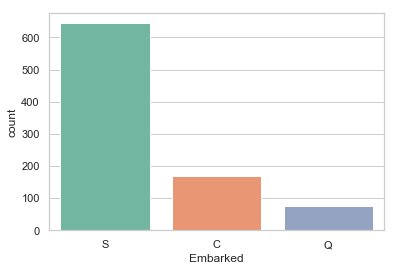

In [164]:
print('それぞれの乗船港の乗船人数：')
print(train['Embarked'].value_counts())
sns.countplot(x = 'Embarked', data = train, palette = "Set2")
plt.show()

In [165]:
#Sで一番多くの乗客が乗っていたので、2人のNaNの「S」を置き換える。
#最終的なデータ調整（train＆test）

In [166]:
#データセット内の欠損値をこれまでの評価に基づいて、データに対して以下の変更を行いう：

#特定の行に「年齢」が指定されていない場合は、28（中央値年齢）となります。
#リベント行に「Embarked」がない場合は、「S」（最も一般的な搭乗口）と置き換えられます。
#変数として "キャビン"を無視する。転用に欠けている値が多すぎる。
#(この値は乗客のクラスおよび運賃の支払いに関連付けられているようだ。)

In [167]:
train_data = train.copy()
train_data["Age"].fillna(train["Age"].median())
train_data["Embarked"].fillna(train['Embarked'].value_counts().idxmax(), inplace=True)
train_data.drop('Cabin', axis = 1, inplace = True)

In [168]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [169]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [170]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [171]:
#今度は、テストデータに同じ変更を適用する。
#トレーニングデータのために行ったのと同じように、
#テストデータの「年齢」について同じ補完を適用する
#（失われている場合は、年齢= 28）。
#分析データに含めないことにしたので、テストデータから "Cabin"変数も削除する。
#「Embarked」ポート変数に欠損値なし。
#ダミー変数を追加してテストセットを完成させる。
#最後に、「運賃」の欠損値1を中央値14.45に代入する。

In [172]:
#まず、テストデータの欠損数の確認
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [173]:
#欠損値の穴埋め
test_data = test.copy()
test_data["Age"].fillna(test_data["Age"].median(), inplace = True)
test_data["Fare"].fillna(test_data["Fare"].median(), inplace = True)
test_data.drop('Cabin', axis=1, inplace=True)

test_data['TravelAlone']=np.where((test_data["SibSp"]+test_data["Parch"])>0, 0, 1)

In [174]:
#関連性の低い項目の削除
test_data.drop('SibSp', axis = 1, inplace = True)
test_data.drop('Parch', axis = 1, inplace = True)

In [175]:
#ダミー変数に変換
testing = pd.get_dummies(test_data, columns = ["Pclass", "Embarked", "Sex"])

In [176]:
#関連性の低い項目の削除
testing.drop('Sex_female', axis = 1, inplace = True)
testing.drop('PassengerId', axis = 1, inplace = True)
testing.drop('Name', axis = 1, inplace = True)
testing.drop('Ticket', axis = 1, inplace = True)

In [177]:
finish_testing["Age"] = finish_testing["Age"].fillna(finish_testing["Age"].median())

In [178]:
finish_testing = testing
finish_testing.head()

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,34.5,7.8292,1,0,0,1,0,1,0,1
1,47.0,7.0000,0,0,0,1,0,0,1,0
2,62.0,9.6875,1,0,1,0,0,1,0,1
3,27.0,8.6625,1,0,0,1,0,0,1,1
4,22.0,12.2875,0,0,0,1,0,0,1,0


In [179]:
#単独で旅行するためのカテゴリ変数を作成
train_data['TravelAlone']=np.where((train_data["SibSp"]+train_data["Parch"])>0, 0, 1)
train_data.drop('SibSp', axis=1, inplace=True)
train_data.drop('Parch', axis=1, inplace=True)

In [180]:
#また、旅客クラス（ "Pclass"）、性別（ "Sex"）、およびポートEmbarked（ "Embarked"）のカテゴリ変数を作成
training=pd.get_dummies(train_data, columns=["Pclass","Embarked","Sex"])
training.drop('Sex_female', axis=1, inplace=True)
training.drop('PassengerId', axis=1, inplace=True)
training.drop('Name', axis=1, inplace=True)
training.drop('Ticket', axis=1, inplace=True)

finish_train = training
finish_train.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,0,1,0,0,1,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1


In [181]:
#ロジスティック回帰と結果

In [182]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
model = LogisticRegression()

In [183]:
finish_train["Age"] = finish_train["Age"].fillna(finish_train["Age"].median())
cols = ["Age", "Fare", "TravelAlone", "Pclass_1", "Pclass_2", "Pclass_3", "Embarked_C", "Embarked_Q", "Embarked_S", "Sex_male"]
X = finish_train[cols]
y = finish_train["Survived"]

In [184]:
model.fit(X, y)#学習精度

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [185]:
X.isnull().sum()

Age            0
Fare           0
TravelAlone    0
Pclass_1       0
Pclass_2       0
Pclass_3       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
Sex_male       0
dtype: int64

In [186]:
finish_testing.head()

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,34.5,7.8292,1,0,0,1,0,1,0,1
1,47.0,7.0000,0,0,0,1,0,0,1,0
2,62.0,9.6875,1,0,1,0,0,1,0,1
3,27.0,8.6625,1,0,0,1,0,0,1,1
4,22.0,12.2875,0,0,0,1,0,0,1,0


In [187]:
print('傾き:{0}'.format(model.coef_[0]))

傾き:[-2.96621479e-02  1.13558287e-03  6.52578810e-02  1.42986391e+00
  5.92240279e-01 -6.57748255e-01  6.44628631e-01  5.87626863e-01
  1.32100444e-01 -2.46128986e+00]


In [188]:
print('y切片:{0}'.format(model.intercept_))

y切片:[1.36435594]


In [189]:
y_test_pred = model.predict(finish_testing)

In [190]:
X_test = finish_testing.shape[0],
X_test_PassengerId = finish_testing.shape[0]

In [195]:
test_predict= model.predict(finish_testing)
print(test_predict)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [202]:
final_test_PassengerId = test['PassengerId']

In [205]:
logistic_two = pd.DataFrame({
    "PassengerId": final_test_PassengerId,
    "Survived": test_predict
})
logistic_two.to_csv('logistic_two.csv', index = False)    
logistic_two.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0
